In [1]:
import ModeSelection
from ModeSelection import *
import plot
from plot import *
import Fit 
from Fit import *

2023-03-16 16:16:53.283232: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-03-16 16:16:53.482131: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-03-16 16:16:53.486111: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [2]:
from importlib import reload
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
reload(ModeSelection)
from ModeSelection import *
reload(plot)
from plot import *
reload(Fit)
from Fit import *

In [4]:
batch_runname = "eff2c_overtone4_a_0.7_clean_only_320"
i = 0
inject_params = read_json_for_param_dict(i, batch_runname)

In [5]:
h_eff = make_eff_ringdown_waveform_from_param(inject_params, delay = False)

2023-03-16 16:17:07.159297: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-03-16 16:17:07.159357: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


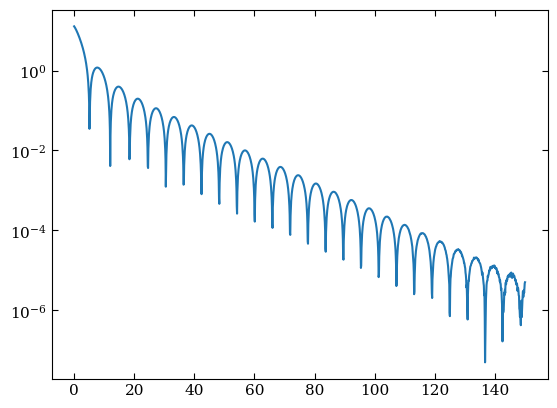

In [6]:
plt.semilogy(h_eff.time, np.abs(h_eff.hr))

In [7]:
t0_arr = np.linspace(0, 10, num = 101)
qnm_fixed_list = []
N_free = 6
fitter = QNMFitVaryingStartingTime(h_eff, t0_arr, N_free = N_free,
                                    qnm_fixed_list = qnm_fixed_list, load_pickle = False,
                                    run_string_prefix = f"overtone_test_0", random_initial = True,
                                    initial_num = 10)

In [8]:
fitter.do_fits()

10it [08:50, 53.03s/it]
101it [02:22,  1.41s/it]


In [34]:
result = fitter.result_full

In [35]:
result.mismatch_initial_arr

array([0.00017018, 0.00017018, 0.00017018, 0.00017018, 0.00017018,
       0.00017018, 0.00017018, 0.00017018, 0.00017018, 0.00017018])

In [36]:
result.status_arr

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

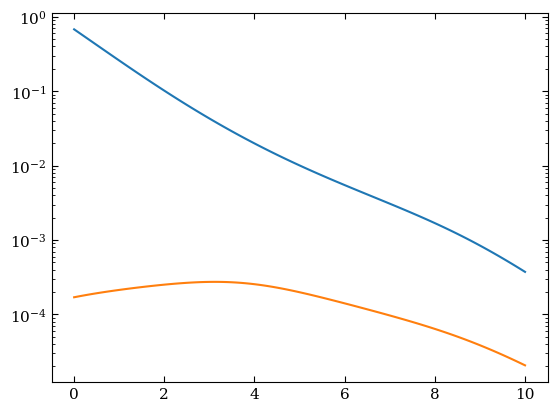

In [37]:
plt.semilogy(t0_arr, result.cost_arr)
plt.semilogy(t0_arr, result.mismatch_arr)

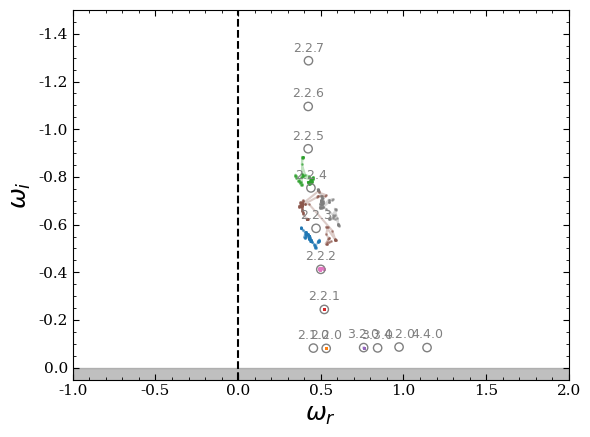

In [26]:
fig, ax = plt.subplots()
plot_omega_free(result, ax = ax)
ax.set_ylim(0.05, -1.5)
ax.set_xlim(-1, 2)
# function below caps ylim at -0.7
plot_predicted_qnms(ax, long_str_to_qnms("2.2.0_3.3.0_4.4.0_2.1.0_3.2.0_4.2.0"
                                         "_2.2.1_2.2.2_2.2.3_2.2.4_2.2.5_2.2.6_2.2.7", 1, 0.7), change_lim = False)

In [39]:
t0_arr = np.linspace(0, 10, num = 101)
qnm_fixed_list = long_str_to_qnms("2.2.0_3.3.0_4.4.0_2.1.0_3.2.0_4.2.0"
                                "_2.-2.0_3.-2.0_2.2.1_2.2.2_2.2.3_constant", 1, 0.7)
N_free = 0
fitter = QNMFitVaryingStartingTime(h_eff, t0_arr, N_free = N_free,
                                    qnm_fixed_list = qnm_fixed_list, load_pickle = True,
                                    run_string_prefix = f"overtone_test_0")

In [40]:
fitter.do_fits()

reloaded fit overtone_test_0_N_0_fix_2.-2.0_2.1.0_2.2.0_2.2.1_2.2.2_2.2.3_3.-2.0_3.2.0_3.3.0_4.2.0_4.4.0_constant_t0_0.0000_10.0000_101 from an old run.


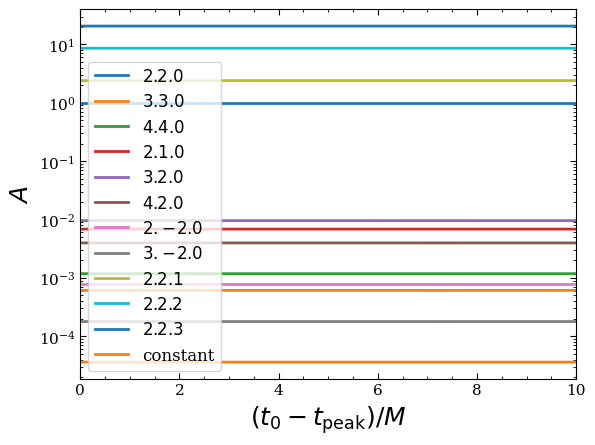

In [41]:
plot_amplitudes(fitter.result_full, fixed_modes = qnm_fixed_list)